In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import time

Generate data based on a linear equation ($y = 2x + 5$) distorted with noise.

<function matplotlib.pyplot.show(close=None, block=None)>

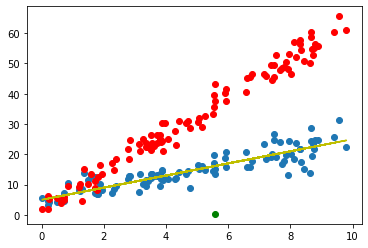

In [44]:
def lin():
    """
    Where A is an array of inputs for 'x'
    """
    li = [0]*100
    Y = [0]*100
    O = [0]*100
    for i in range(100):
        li[i] = random.random()*10
        y = 2*li[i] + 5
        Y[i] = y + np.random.normal(0,3) #adding noise
        O[i] = [li[i],Y[i]]
    return O

A = lin()

xVec = np.random.rand(2)*10
temp = np.matmul(A,xVec)
b = temp + np.random.normal(0,3,temp.shape)

def f(X, a=A,B=b):
    return 0.5*np.linalg.norm(np.matmul(a,x)-B)**2

def f_grad(X,a=A, B=b):
    return np.matmul(np.array(a).transpose(),(np.matmul(a,X)-B))

def GD(x, lamb, gradient_function):
    x1 = x - lamb*gradient_function(x)
    return x1

aaa = [0]*100
bbb = [0]*100
ccc = [0]*100
for i in range(100):
    aaa[i] = A[i][0]
    bbb[i] = A[i][1]
    ccc[i] = 2*A[i][0] + 5
plt.scatter(aaa, bbb)
plt.scatter(aaa, b, c = 'r')
plt.scatter(xVec[0], xVec[1], c = 'g')
plt.plot(aaa, ccc, 'y')
plt.show

## Barzilai-Borwein

In [46]:
x = xVec
x1 = GD(x,lam,f_grad)

In [47]:
np.dot(x1 - x, f_grad(x1) - f_grad(x))

5.716886166814925

In [48]:
x1 - x

array([-0.00366009, -0.01372358])

In [49]:
f_grad(x1) - f_grad(x)

array([-130.1491648 , -381.86302023])

In [50]:
def Lam_func(x2, x1, f_grad):
    return np.dot(x2 - x1, f_grad(x2) - f_grad(x1))/np.linalg.norm(f_grad(x2) - f_grad(x1))**2

----------------------


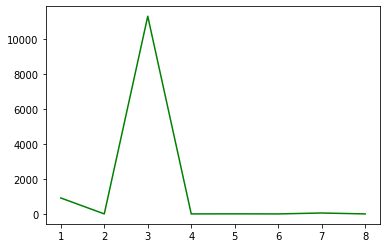

x value [5.65523874 0.30354308]
Gradient [-2.66401759e-04  9.07968714e-05]
Iterations: 10
Time taken: 0.1756436824798584
Lambda:  [0.43991642160042554, 3.512503317405956e-05, 3.512503317405956e-05, 0.006331621367318583, 0.0063316213673184135, 3.5125033174059555e-05, 3.512503317405956e-05, 0.0063316213673190735, 0.006331621367255011, 3.5125033174063716e-05]


In [51]:
current = time.time()
X =[]
lam = random.random()
# print('lambda initial: ',lam)
Lambd = [lam]
# theta = 100000
# print('theta intial:', theta)
x = xVec
# print('x intial:', x)
x1 = GD(x,lam,f_grad)
# print('x1 intial:', x1)
gr2 = []
count =1
while np.linalg.norm(f_grad(x1)) > 1e-3:
    lam_prev = lam
#     min1 = np.sqrt(1 + theta)*lam
#     min2 = (np.linalg.norm(x1 - x))/(2*np.linalg.norm(f_grad(x1) - f_grad(x)))
#     print('min1:', min1)
#     print('min2:', min2)
    lam = Lam_func(x1, x, f_grad)
#     print('lambda: ',lam)
    Lambd.append(lam)
    temp = x1
    x1 = GD(x, lam, f_grad)
#     print('x1:', x1)
    x = temp
#     print('x:', x)
#     theta = (lam/lam_prev)
#     print('theta:', theta)
    count += 1
    grad = np.linalg.norm(f_grad(x1))
#     print('Gradient Norm:', grad)
    gr2.append(grad)
print('----------------------')
plt.plot(range(1,len(gr2)), gr2[1:], c='g')
plt.show()
print('x value', x1)
print('Gradient', f_grad(x1))
print('Iterations:', count)
print('Time taken:', time.time() - current)
La = [Lambd[0], Lambd[1]]
for i in range(2,len(Lambd), int(np.floor(len(Lambd)/10))):
    La.append(Lambd[i])
print('Lambda: ', La)

\begin{align}
\text{min } \mathbf{x}: \\
f(\mathbf{x}) &= \frac{1}{2} \|A \mathbf{x} - b \|^2\\
\nabla f(\mathbf{\mathbf{x}}) &= A^T(A \mathbf{x} -b)\\
{\mathbf{x}}_{k+1} &= \mathbf{x}_k - \lambda_k \nabla f(\mathbf{x}_k)
\end{align}


## Backtracking Line Search

In [36]:
def Line(x,f,f_grad):
    alph_prime = 1
    rho = 0.5
    c = 0.1
    alph = alph_prime
    while f(x - alph*f_grad(x)) > f(x) - c*alph*np.linalg.norm(f_grad(x))**2:
        print('LHS: ', f(x - alph*f_grad(x)))
        print('RHS: ', f(x) - c*alph*np.linalg.norm(f_grad(x))**2)
        ### is norm the right move here?
        alph = rho*alph
        print('Alpha:', alph)
    return alph

In [42]:
np.linalg.norm(np.transpose(A)@A, ord = 2)

27506.83186920276

In [43]:
2/np.linalg.norm(np.transpose(A)@A, ord = 2)

7.270920946149537e-05

In [37]:
Line(xVec,f, f_grad)

LHS:  431.97513797010447
RHS:  -4446.836241093292
Alpha: 0.5
LHS:  431.97513797010447
RHS:  -2007.430551561594
Alpha: 0.25
LHS:  431.97513797010447
RHS:  -787.7277067957448
Alpha: 0.125
LHS:  431.97513797010447
RHS:  -177.87628441282016
Alpha: 0.0625
LHS:  431.97513797010447
RHS:  127.04942677864216
Alpha: 0.03125
LHS:  431.97513797010447
RHS:  279.5122823743733
Alpha: 0.015625
LHS:  431.97513797010447
RHS:  355.7437101722389
Alpha: 0.0078125
LHS:  431.97513797010447
RHS:  393.8594240711717
Alpha: 0.00390625
LHS:  431.97513797010447
RHS:  412.9172810206381
Alpha: 0.001953125
LHS:  431.97513797010447
RHS:  422.44620949537125
Alpha: 0.0009765625
LHS:  431.97513797010447
RHS:  427.21067373273786
Alpha: 0.00048828125
LHS:  431.97513797010447
RHS:  429.59290585142116
Alpha: 0.000244140625
LHS:  431.97513797010447
RHS:  430.7840219107628
Alpha: 0.0001220703125
LHS:  431.97513797010447
RHS:  431.37957994043364
Alpha: 6.103515625e-05
LHS:  431.97513797010447
RHS:  431.6773589552691
Alpha: 3.05

3.469446951953614e-18

In [9]:
f(xVec - 0.5*f_grad(xVec))

433.3845438704458

In [31]:

current = time.time()
X = []
L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
lamb = 1/L
x = xVec
gr = []
count = 1
while np.linalg.norm(f_grad(x)) > 1e-3:
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr.append(np.linalg.norm(f_grad(x)))
    count += 1
    lamb = Line(x,f,f_grad)
    print('x= ', x)
    print('lambda', lamb)
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.show()
print(x)
print(f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251565e-16
x=  [[8.76904411]
 [9.76492929]]
lambda 1.1102230246251

KeyboardInterrupt: 

### Vanilla Gradient Descent

----------------------


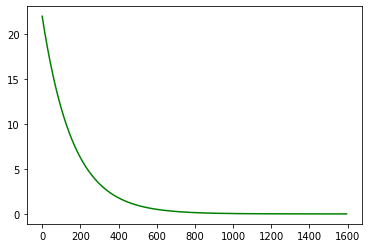

[[8.64801024]
 [9.80651423]]
[[ 0.00094213]
 [-0.0003237 ]]
Iterations: 1596
Time taken: 1.5806443691253662
Lambda:  3.635460473074769e-05


In [32]:
current = time.time()
X = []
L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
lamb = 1/L
x = xVec
gr = []
count = 1
while np.linalg.norm(f_grad(x)) > 1e-3:
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr.append(np.linalg.norm(f_grad(x)))
    count += 1
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.show()
print(x)
print(f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

Adaptive Gradient Descent

----------------------


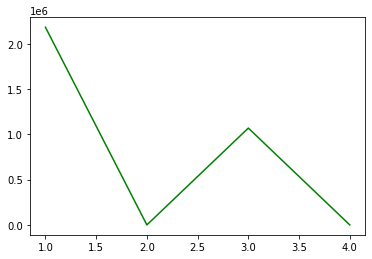

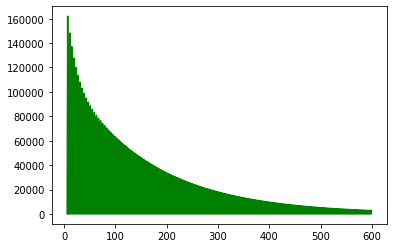

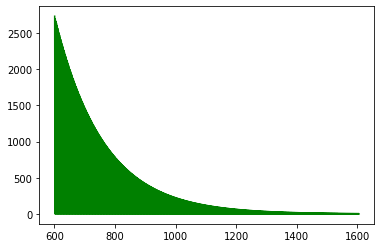

x value [[8.64801019]
 [9.80651424]]
Gradient [[ 0.00093773]
 [-0.00031164]]
Iterations: 1608
Time taken: 2.1046383380889893
Lambda:  [0.7253603360702442, 1.826950274919847e-05, 1.826950274919847e-05, 7.225041570279977e-05, 7.225715150015004e-05, 7.225715250630728e-05, 7.225715250613575e-05, 7.225715250580685e-05, 7.225715250547083e-05, 7.225715250513872e-05, 7.225715250474211e-05, 7.225715250429818e-05, 7.225715250364716e-05]


In [29]:
current = time.time()
X =[]
lam = random.random()
# print('lambda initial: ',lam)
Lambd = [lam]
theta = 100000
# print('theta intial:', theta)
x = xVec
# print('x intial:', x)
x1 = GD(x,lam,f_grad)
# print('x1 intial:', x1)
gr2 = []
count =1
while np.linalg.norm(f_grad(x1)) > 1e-3:
    lam_prev = lam
    min1 = np.sqrt(1 + theta)*lam
    min2 = (np.linalg.norm(x1 - x))/(2*np.linalg.norm(f_grad(x1) - f_grad(x)))
#     print('min1:', min1)
#     print('min2:', min2)
    lam = np.min([min1, min2])
#     print('lambda: ',lam)
    Lambd.append(lam)
    temp = x1
    x1 = GD(x, lam, f_grad)
#     print('x1:', x1)
    x = temp
#     print('x:', x)
    theta = (lam/lam_prev)
#     print('theta:', theta)
    count += 1
    grad = np.linalg.norm(f_grad(x1))
#     print('Gradient Norm:', grad)
    gr2.append(grad)
print('----------------------')
plt.plot(range(1,5), gr2[1:5], c='g')
plt.show()
plt.plot(range(6,600), gr2[6:600], c='g')
plt.show()
plt.plot(range(601,len(gr2)), gr2[601:], c='g')
plt.show()

print('x value', x1)
print('Gradient', f_grad(x1))
print('Iterations:', count)
print('Time taken:', time.time() - current)
La = [Lambd[0], Lambd[1]]
for i in range(2,len(Lambd), int(np.floor(len(Lambd)/10))):
    La.append(Lambd[i])
print('Lambda: ', La)

In [39]:
np.e

2.718281828459045

In [40]:
def sigmoid(x):
    return 1/(1 + np.e**(-x))

In [41]:
sigmoid(x)

array([[0.99993949],
       [0.99917529]])

lambda initial:  0.3481182557922553
theta intial: 100000
x intial: [[9.76382591]
 [7.1557422 ]]
x1 intial: [[-224.0563133 ]
 [-644.93510806]]
min1: 110.0852087607787
min2: 1.7612936031133903e-05
lambda:  1.7612936031133903e-05
x1: [[9.75199586]
 [7.12274987]]
x: [[-224.0563133 ]
 [-644.93510806]]
theta: 5.059469228653346e-05
Gradient Norm: 994.9890389809377
min1: 1.7613381586037676e-05
min2: 1.7612936031133896e-05
lambda:  1.7612936031133896e-05
x1: [[-107.90537689]
 [-318.6556806 ]]
x: [[9.75199586]
 [7.12274987]]
theta: 0.9999999999999997
Gradient Norm: 9831866.246485278
min1: 2.4908453008439306e-05
min2: 1.7613075220517937e-05
lambda:  1.7613075220517937e-05
x1: [[9.74604297]
 [7.10626708]]
x: [[-107.90537689]
 [-318.6556806 ]]
theta: 1.0000079026792463
Gradient Norm: 497.50490687196395
min1: 2.4908699063172905e-05
min2: 1.7613075220517934e-05
lambda:  1.7613075220517934e-05
x1: [[ -49.827565  ]
 [-155.51583636]]
x: [[9.74604297]
 [7.10626708]]
theta: 0.9999999999999998
Gradient Nor

min1: 9.967721499566393e-05
min2: 6.96999451451251e-05
lambda:  6.96999451451251e-05
x1: [[9.73049065]
 [7.09319682]]
x: [[8.68335859]
 [7.18403996]]
theta: 0.9888587430763904
Gradient Norm: 2.942792048844769
min1: 9.829567418159086e-05
min2: 6.968899452010097e-05
lambda:  6.968899452010097e-05
x1: [[8.86990015]
 [7.67535655]]
x: [[9.73049065]
 [7.09319682]]
theta: 0.9998428890438675
Gradient Norm: 7377.969384323271
min1: 9.85512501001148e-05
min2: 7.041061937349083e-05
lambda:  7.041061937349083e-05
x1: [[9.7302988 ]
 [7.09327509]]
x: [[8.86990015]
 [7.67535655]]
theta: 1.0103549327746681
Gradient Norm: 2.91017431598054
min1: 9.983309485677366e-05
min2: 7.039942987794613e-05
lambda:  7.039942987794613e-05
x1: [[8.70607985]
 [7.18246275]]
x: [[9.7302988 ]
 [7.09327509]]
theta: 0.9998410822736078
Gradient Norm: 7367.019956829076
min1: 9.955587298275102e-05
min2: 6.977499963456317e-05
lambda:  6.977499963456317e-05
x1: [[9.73010458]
 [7.09333435]]
x: [[8.70607985]
 [7.18246275]]
theta: 0

min1: 9.908944956310873e-05
min2: 7.006689087399646e-05
lambda:  7.006689087399646e-05
x1: [[9.72470063]
 [7.09525949]]
x: [[9.02310057]
 [7.15709337]]
theta: 0.999961561773427
Gradient Norm: 1.972501715369973
min1: 9.908859513612826e-05
min2: 7.005584477618242e-05
lambda:  7.005584477618242e-05
x1: [[9.14814091]
 [7.48631041]]
x: [[9.72470063]
 [7.09525949]]
theta: 0.9998423492511762
Gradient Norm: 4970.423315488774
min1: 9.907002095938169e-05
min2: 7.007916844493487e-05
lambda:  7.007916844493487e-05
x1: [[9.72457268]
 [7.0953118 ]]
x: [[9.14814091]
 [7.48631041]]
theta: 1.0003329296624281
Gradient Norm: 1.9507032189283071
min1: 9.911515901895634e-05
min2: 7.006811899682253e-05
lambda:  7.006811899682253e-05
x1: [[9.03826208]
 [7.15582986]]
x: [[9.72457268]
 [7.0953118 ]]
theta: 0.9998423290635787
Gradient Norm: 4916.3191109518275
min1: 9.90873781444016e-05
min2: 7.006819826699925e-05
lambda:  7.006819826699925e-05
x1: [[9.72444194]
 [7.09535165]]
x: [[9.03826208]
 [7.15582986]]
thet

min1: 9.910291836461027e-05
min2: 7.006248393313351e-05
lambda:  7.006248393313351e-05
x1: [[9.24013609]
 [7.13896978]]
x: [[9.72108899]
 [7.09655092]]
theta: 0.9998427012724254
Gradient Norm: 3445.0179268070606
min1: 9.90794184953257e-05
min2: 7.007320826318916e-05
lambda:  7.007320826318916e-05
x1: [[9.72099735]
 [7.0965788 ]]
x: [[9.24013609]
 [7.13896978]]
theta: 1.0001530680822832
Gradient Norm: 1.3518713267190596
min1: 9.910227361587066e-05
min2: 7.00621866763498e-05
lambda:  7.00621866763498e-05
x1: [[9.32583665]
 [7.36460824]]
x: [[9.72099735]
 [7.0965788 ]]
theta: 0.999842713255001
Gradient Norm: 3406.9381988025784
min1: 9.907899842411123e-05
min2: 7.007347312776322e-05
lambda:  7.007347312776322e-05
x1: [[9.72090968]
 [7.0966147 ]]
x: [[9.32583665]
 [7.36460824]]
theta: 1.0001610919091857
Gradient Norm: 1.3369323033650102
min1: 9.910284698548796e-05
min2: 7.00624522386948e-05
lambda:  7.00624522386948e-05
x1: [[9.25052674]
 [7.13810136]]
x: [[9.72090968]
 [7.0966147 ]]
theta:

min1: 9.910255396743605e-05
min2: 7.006233361952565e-05
lambda:  7.006233361952565e-05
x1: [[9.36654577]
 [7.12840439]]
x: [[9.71890764]
 [7.0973268 ]]
theta: 0.9998430169751175
Gradient Norm: 2523.9287168925157
min1: 9.907921374865027e-05
min2: 7.007332049705488e-05
lambda:  7.007332049705488e-05
x1: [[9.71884049]
 [7.0973472 ]]
x: [[9.36654577]
 [7.12840439]]
theta: 1.0001568157519403
Gradient Norm: 0.990396901994152
min1: 9.910252518824493e-05
min2: 7.006232096930868e-05
lambda:  7.006232096930868e-05
x1: [[9.42933283]
 [7.29371455]]
x: [[9.71884049]
 [7.0973472 ]]
theta: 0.9998430283070905
Gradient Norm: 2496.039925750348
min1: 9.907919613995671e-05
min2: 7.007333101037738e-05
lambda:  7.007333101037738e-05
x1: [[9.71877628]
 [7.09737352]]
x: [[9.42933283]
 [7.29371455]]
theta: 1.0001571463936163
Gradient Norm: 0.979452422604497
min1: 9.910254824812595e-05
min2: 7.006233227097081e-05
lambda:  7.006233227097081e-05
x1: [[9.3741583 ]
 [7.12776812]]
x: [[9.71877628]
 [7.09737352]]
the

min2: 7.007330087020676e-05
lambda:  7.007330087020676e-05
x1: [[9.71707217]
 [7.09797718]]
x: [[9.4701895 ]
 [7.11974159]]
theta: 1.0001566283502197
Gradient Norm: 0.6940323009097827
min1: 9.910249278797125e-05
min2: 7.00623267806855e-05
lambda:  7.00623267806855e-05
x1: [[9.51418971]
 [7.2355884 ]]
x: [[9.71707217]
 [7.09797718]]
theta: 0.9998433912861963
Gradient Norm: 1749.186493463653
min1: 9.907921334978767e-05
min2: 7.00733003787455e-05
lambda:  7.00733003787455e-05
x1: [[9.71702718]
 [7.09799565]]
x: [[9.51418971]
 [7.2355884 ]]
theta: 1.0001566262293051
Gradient Norm: 0.6863628398376613
min1: 9.910249204037e-05
min2: 7.006232708719482e-05
lambda:  7.006232708719482e-05
x1: [[9.47552425]
 [7.11929569]]
x: [[9.71702718]
 [7.09799565]]
theta: 0.9998434026727532
Gradient Norm: 1729.858716871553
min1: 9.90792140653052e-05
min2: 7.007329930681762e-05
lambda:  7.007329930681762e-05
x1: [[9.71698115]
 [7.09800961]]
x: [[9.47552425]
 [7.11929569]]
theta: 1.0001566065541776
Gradient Nor

min2: 7.007327943007958e-05
lambda:  7.007327943007958e-05
x1: [[9.7159994 ]
 [7.09836121]]
x: [[9.56405469]
 [7.20143137]]
theta: 1.0001563249930123
Gradient Norm: 0.5141382313321725
min1: 9.910245495059207e-05
min2: 7.006232695378178e-05
lambda:  7.006232695378178e-05
x1: [[9.53509055]
 [7.11431697]]
x: [[9.7159994 ]
 [7.09836121]]
theta: 0.9998436996757268
Gradient Norm: 1295.8301615679939
min1: 9.907922123391913e-05
min2: 7.007327861251052e-05
lambda:  7.007327861251052e-05
x1: [[9.71596491]
 [7.09837165]]
x: [[9.53509055]
 [7.11431697]]
theta: 1.0001563130887154
Gradient Norm: 0.5084567117641946
min1: 9.910245349941642e-05
min2: 7.006232693931707e-05
lambda:  7.006232693931707e-05
x1: [[9.56732656]
 [7.19919017]]
x: [[9.71596491]
 [7.09837165]]
theta: 0.9998437111348248
Gradient Norm: 1281.5117767251804
min1: 9.907922149732556e-05
min2: 7.007327782240288e-05
lambda:  7.007327782240288e-05
x1: [[9.71593196]
 [7.0983852 ]]
x: [[9.56732656]
 [7.19919017]]
theta: 1.0001563020179918
Gr

theta: 1.0001560258792146
Gradient Norm: 0.3851289736223299
min1: 9.910241791861203e-05
min2: 7.00623269499312e-05
lambda:  7.00623269499312e-05
x1: [[9.57971146]
 [7.11058742]]
x: [[9.71522952]
 [7.09863504]]
theta: 0.9998439984752516
Gradient Norm: 970.7011321298006
min1: 9.907922863025801e-05
min2: 7.007325767651918e-05
lambda:  7.007325767651918e-05
x1: [[9.71520369]
 [7.09864285]]
x: [[9.57971146]
 [7.11058742]]
theta: 1.0001560143241575
Gradient Norm: 0.38087308494748723
min1: 9.910241648880174e-05
min2: 7.006232694929601e-05
lambda:  7.006232694929601e-05
x1: [[9.60385932]
 [7.17416559]]
x: [[9.71520369]
 [7.09864285]]
theta: 0.9998440100034506
Gradient Norm: 959.9752882397484
min1: 9.907922891493332e-05
min2: 7.007325686920775e-05
lambda:  7.007325686920775e-05
x1: [[9.71517901]
 [7.09865301]]
x: [[9.60385932]
 [7.17416559]]
theta: 1.0001560028104641
Gradient Norm: 0.37666422640449043
min1: 9.910241506181001e-05
min2: 7.006232695011545e-05
lambda:  7.006232695011545e-05
x1: [[9

x1: [[9.61313682]
 [7.10779363]]
x: [[9.71465284]
 [7.09884015]]
theta: 0.9998442990736124
Gradient Norm: 727.1482933370874
min1: 9.907923608095851e-05
min2: 7.007323660829615e-05
lambda:  7.007323660829615e-05
x1: [[9.71463349]
 [7.098846  ]]
x: [[9.61313682]
 [7.10779363]]
theta: 1.0001557135733108
Gradient Norm: 0.28530326421733015
min1: 9.910237924197218e-05
min2: 7.006232695310983e-05
lambda:  7.006232695310983e-05
x1: [[9.63122589]
 [7.15541977]]
x: [[9.71463349]
 [7.098846  ]]
theta: 0.9998443106710297
Gradient Norm: 719.1136071244999
min1: 9.907923636838526e-05
min2: 7.007323579547756e-05
lambda:  7.007323579547756e-05
x1: [[9.714615  ]
 [7.09885361]]
x: [[9.63122589]
 [7.15541977]]
theta: 1.0001557019705474
Gradient Norm: 0.2821505090933223
min1: 9.910237780498538e-05
min2: 7.006232695327555e-05
lambda:  7.006232695327555e-05
x1: [[9.61533001]
 [7.10761031]]
x: [[9.714615  ]
 [7.09885361]]
theta: 0.9998443222711472
Gradient Norm: 711.16770085623
min1: 9.907923665597467e-05
min

min1: 9.910233019685051e-05
min2: 7.006232695768186e-05
lambda:  7.006232695768186e-05
x1: [[9.65693174]
 [7.13781153]]
x: [[9.71409791]
 [7.0990368 ]]
theta: 0.9998447065704905
Gradient Norm: 492.8685432696212
min1: 9.907924618196784e-05
min2: 7.007320804740067e-05
lambda:  7.007320804740067e-05
x1: [[9.71408525]
 [7.09904203]]
x: [[9.65693174]
 [7.13781153]]
theta: 1.0001553058568178
Gradient Norm: 0.19337498816814883
min1: 9.910232874856547e-05
min2: 7.00623269578182e-05
lambda:  7.00623269578182e-05
x1: [[9.64603697]
 [7.10504372]]
x: [[9.71408525]
 [7.09904203]]
theta: 0.9998447182612916
Gradient Norm: 487.42255092165556
min1: 9.907924647176207e-05
min2: 7.007320722800897e-05
lambda:  7.007320722800897e-05
x1: [[9.71407227]
 [7.09904594]]
x: [[9.64603697]
 [7.10504372]]
theta: 1.000155294159689
Gradient Norm: 0.19123809379285264
min1: 9.910232729994496e-05
min2: 7.006232695795216e-05
lambda:  7.006232695795216e-05
x1: [[9.65816245]
 [7.13696851]]
x: [[9.71407227]
 [7.09904594]]
th

min1: 9.910227931004062e-05
min2: 7.0062326962404e-05
lambda:  7.0062326962404e-05
x1: [[9.66708303]
 [7.10328461]]
x: [[9.71372218]
 [7.09917116]]
theta: 0.9998451173364107
Gradient Norm: 334.07133636700615
min1: 9.90792563640297e-05
min2: 7.007317925741476e-05
lambda:  7.007317925741476e-05
x1: [[9.71371329]
 [7.09917384]]
x: [[9.66708303]
 [7.10328461]]
theta: 1.0001548948697718
Gradient Norm: 0.13106723950840113
min1: 9.91022778501471e-05
min2: 7.006232696252573e-05
lambda:  7.006232696252573e-05
x1: [[9.67539363]
 [7.12516534]]
x: [[9.71371329]
 [7.09917384]]
theta: 0.9998451291206703
Gradient Norm: 330.3799871332755
min1: 9.907925665611836e-05
min2: 7.007317843148468e-05
lambda:  7.007317843148468e-05
x1: [[9.7137048 ]
 [7.09917734]]
x: [[9.67539363]
 [7.12516534]]
theta: 1.0001548830795293
Gradient Norm: 0.12961888073489275
min1: 9.9102276389973e-05
min2: 7.006232696267145e-05
lambda:  7.006232696267145e-05
x1: [[9.66809064]
 [7.10320039]]
x: [[9.7137048 ]
 [7.09917734]]
theta: 

Gradient Norm: 250.25148976383704
min1: 9.907926398031636e-05
min2: 7.007315772214851e-05
lambda:  7.007315772214851e-05
x1: [[9.71351708]
 [7.09924374]]
x: [[9.67858655]
 [7.10232311]]
theta: 1.0001545874468154
Gradient Norm: 0.09817958821082746
min1: 9.910223977751524e-05
min2: 7.00623269660665e-05
lambda:  7.00623269660665e-05
x1: [[9.68481199]
 [7.11871387]]
x: [[9.71351708]
 [7.09924374]]
theta: 0.9998454364490756
Gradient Norm: 247.48631497622284
min1: 9.90792642741823e-05
min2: 7.007315689131414e-05
lambda:  7.007315689131414e-05
x1: [[9.71351073]
 [7.09924637]]
x: [[9.68481199]
 [7.11871387]]
theta: 1.0001545755860048
Gradient Norm: 0.09709465590413206
min1: 9.91022383086571e-05
min2: 7.006232696617937e-05
lambda:  7.006232696617937e-05
x1: [[9.67934135]
 [7.10226002]]
x: [[9.71351073]
 [7.09924637]]
theta: 0.9998454483055249
Gradient Norm: 244.75169421971972
min1: 9.907926456804669e-05
min2: 7.007315606033885e-05
lambda:  7.007315606033885e-05
x1: [[9.71350421]
 [7.09924833]]


x1: [[9.71333736]
 [7.09930803]]
x: [[9.69322573]
 [7.11295055]]
theta: 1.000154194650293
Gradient Norm: 0.06804047241776448
min1: 9.91021911318685e-05
min2: 7.006232697054921e-05
lambda:  7.006232697054921e-05
x1: [[9.68939199]
 [7.10141994]]
x: [[9.71333736]
 [7.09930803]]
theta: 0.9998458291242441
Gradient Norm: 171.51822400818207
min1: 9.907927400776452e-05
min2: 7.007312936938194e-05
lambda:  7.007312936938194e-05
x1: [[9.7133328]
 [7.0993094]]
x: [[9.68939199]
 [7.10141994]]
theta: 1.000154182701315
Gradient Norm: 0.06728859329011523
min1: 9.910218965208081e-05
min2: 7.006232697066245e-05
lambda:  7.006232697066245e-05
x1: [[9.6936588]
 [7.1126539]]
x: [[9.7133328]
 [7.0993094]]
theta: 0.9998458410689418
Gradient Norm: 169.62301905458284
min1: 9.907927430381547e-05
min2: 7.007312853222256e-05
lambda:  7.007312853222256e-05
x1: [[9.71332844]
 [7.0993112 ]]
x: [[9.6936588]
 [7.1126539]]
theta: 1.0001541707509176
Gradient Norm: 0.06654502281646658
min1: 9.910218817205823e-05
min2: 7

min1: 9.910213914380412e-05
min2: 7.006232697533179e-05
lambda:  7.006232697533179e-05
x1: [[9.69972227]
 [7.1085005 ]]
x: [[9.71320649]
 [7.0993544 ]]
theta: 0.9998462487802647
Gradient Norm: 116.25680687034603
min1: 9.907928441013211e-05
min2: 7.007309995646149e-05
lambda:  7.007309995646149e-05
x1: [[9.71320351]
 [7.09935563]]
x: [[9.69972227]
 [7.1085005 ]]
theta: 1.000153762822258
Gradient Norm: 0.04560748415690963
min1: 9.910213765239872e-05
min2: 7.006232697544918e-05
lambda:  7.006232697544918e-05
x1: [[9.69715243]
 [7.10077129]]
x: [[9.71320351]
 [7.09935563]]
theta: 0.9998462608187878
Gradient Norm: 114.97221758059325
min1: 9.90792847085131e-05
min2: 7.007309911271103e-05
lambda:  7.007309911271103e-05
x1: [[9.71320045]
 [7.09935655]]
x: [[9.69715243]
 [7.10077129]]
theta: 1.0001537507777272
Gradient Norm: 0.045103501001394625
min1: 9.910213616072275e-05
min2: 7.00623269755974e-05
lambda:  7.00623269755974e-05
x1: [[9.70001257]
 [7.10830165]]
x: [[9.71320045]
 [7.09935655]]
t

lambda:  7.006232697985489e-05
x1: [[9.70187374]
 [7.10037667]]
x: [[9.71312208]
 [7.0993846 ]]
theta: 0.9998466474653127
Gradient Norm: 80.57076295551978
min1: 9.907929429264455e-05
min2: 7.007307201341023e-05
lambda:  7.007307201341023e-05
x1: [[9.71311993]
 [7.09938524]]
x: [[9.70187374]
 [7.10037667]]
theta: 1.000153363926357
Gradient Norm: 0.03160696514097422
min1: 9.910208825134167e-05
min2: 7.006232697998289e-05
lambda:  7.006232697998289e-05
x1: [[9.70387807]
 [7.10565382]]
x: [[9.71311993]
 [7.09938524]]
theta: 0.999846659592357
Gradient Norm: 79.68048959653275
min1: 9.907929459323334e-05
min2: 7.007307116349536e-05
lambda:  7.007307116349536e-05
x1: [[9.71311789]
 [7.09938609]]
x: [[9.70387807]
 [7.10565382]]
theta: 1.00015335179369
Gradient Norm: 0.031257694598867666
min1: 9.910208674876435e-05
min2: 7.006232698013506e-05
lambda:  7.006232698013506e-05
x1: [[9.70211675]
 [7.10035635]]
x: [[9.71311789]
 [7.09938609]]
theta: 0.9998466717216485
Gradient Norm: 78.80005338756963


lambda:  7.00623269848579e-05
x1: [[9.70551921]
 [7.10007196]]
x: [[9.71305921]
 [7.09940696]]
theta: 0.9998470857202311
Gradient Norm: 54.00825149674663
min1: 9.907930515604845e-05
min2: 7.007304129703864e-05
lambda:  7.007304129703864e-05
x1: [[9.71305777]
 [7.09940738]]
x: [[9.70551921]
 [7.10007196]]
theta: 1.000152925439988
Gradient Norm: 0.02118615863689535
min1: 9.910203394727534e-05
min2: 7.006232698494611e-05
lambda:  7.006232698494611e-05
x1: [[9.70686276]
 [7.10360935]]
x: [[9.71305777]
 [7.09940738]]
theta: 0.9998470979438853
Gradient Norm: 53.411482829104045
min1: 9.907930545897413e-05
min2: 7.007304044035199e-05
lambda:  7.007304044035199e-05
x1: [[9.7130564 ]
 [7.09940795]]
x: [[9.70686276]
 [7.10360935]]
theta: 1.0001529132112352
Gradient Norm: 0.020952042928210905
min1: 9.910203243274075e-05
min2: 7.006232698514944e-05
lambda:  7.006232698514944e-05
x1: [[9.70568211]
 [7.10005834]]
x: [[9.7130564 ]
 [7.09940795]]
theta: 0.9998471101705417
Gradient Norm: 52.821308206818

min1: 9.907931518994639e-05
min2: 7.007301292594676e-05
lambda:  7.007301292594676e-05
x1: [[9.71301899]
 [7.09942126]]
x: [[9.70867859]
 [7.10236553]]
theta: 1.000152520433712
Gradient Norm: 0.014682482204935015
min1: 9.910198378949285e-05
min2: 7.006232698939874e-05
lambda:  7.006232698939874e-05
x1: [[9.70785121]
 [7.09987704]]
x: [[9.71301899]
 [7.09942126]]
theta: 0.999847502824528
Gradient Norm: 37.01636125510587
min1: 9.907931549486036e-05
min2: 7.007301206332737e-05
lambda:  7.007301206332737e-05
x1: [[9.71301801]
 [7.09942155]]
x: [[9.70785121]
 [7.09987704]]
theta: 1.0001525081222358
Gradient Norm: 0.01452023506260152
min1: 9.910198226451861e-05
min2: 7.006232698981034e-05
lambda:  7.006232698981034e-05
x1: [[9.70877205]
 [7.10230151]]
x: [[9.71301801]
 [7.09942155]]
theta: 0.9998475151388189
Gradient Norm: 36.607345897303546
min1: 9.907931580048856e-05
min2: 7.007301119992078e-05
lambda:  7.007301119992078e-05
x1: [[9.71301707]
 [7.09942194]]
x: [[9.70877205]
 [7.10230151]]


min1: 9.910193173364067e-05
min2: 7.006232699411605e-05
lambda:  7.006232699411605e-05
x1: [[9.70944952]
 [7.09974345]]
x: [[9.71299143]
 [7.09943106]]
theta: 0.9998479230282655
Gradient Norm: 25.370401168599468
min1: 9.907932591069918e-05
min2: 7.00729826122163e-05
lambda:  7.00729826122163e-05
x1: [[9.71299076]
 [7.09943126]]
x: [[9.70944952]
 [7.09974345]]
theta: 1.0001520876990162
Gradient Norm: 0.00995165645314925
min1: 9.910193019737438e-05
min2: 7.006232699453252e-05
lambda:  7.006232699453252e-05
x1: [[9.71008065]
 [7.10140513]]
x: [[9.71299076]
 [7.09943126]]
theta: 0.9998479354340781
Gradient Norm: 25.090068817326205
min1: 9.90793262186014e-05
min2: 7.00729817424543e-05
lambda:  7.00729817424543e-05
x1: [[9.71299011]
 [7.09943153]]
x: [[9.71008065]
 [7.10140513]]
theta: 1.0001520752789528
Gradient Norm: 0.00984168698450475
min1: 9.910192865960872e-05
min2: 7.006232699445866e-05
lambda:  7.006232699445866e-05
x1: [[9.70952604]
 [7.09973705]]
x: [[9.71299011]
 [7.09943153]]
the

 [7.09943823]]
x: [[9.71059742]
 [7.0996475 ]]
theta: 1.0001516391497431
Gradient Norm: 0.006670613409436094
min1: 9.910187464742661e-05
min2: 7.006232699927719e-05
lambda:  7.006232699927719e-05
x1: [[9.71102048]
 [7.10076136]]
x: [[9.71297119]
 [7.09943823]]
theta: 0.9998483838385148
Gradient Norm: 16.818393142579907
min1: 9.907933733305741e-05
min2: 7.007295031532649e-05
lambda:  7.007295031532649e-05
x1: [[9.71297075]
 [7.09943841]]
x: [[9.71102048]
 [7.10076136]]
theta: 1.0001516266516441
Gradient Norm: 0.006596900818443304
min1: 9.910187309914021e-05
min2: 7.006232699975897e-05
lambda:  7.006232699975897e-05
x1: [[9.71064871]
 [7.09964321]]
x: [[9.71297075]
 [7.09943841]]
theta: 0.9998483963423873
Gradient Norm: 16.632556915564383
min1: 9.907933764348105e-05
min2: 7.007294943862325e-05
lambda:  7.007294943862325e-05
x1: [[9.71297031]
 [7.09943855]]
x: [[9.71064871]
 [7.09964321]]
theta: 1.0001516141315763
Gradient Norm: 0.00652400278212046
min1: 9.910187154908058e-05
min2: 7.0062

Gradient Norm: 0.004996830371410154
min1: 9.910183426272804e-05
min2: 7.006232700319656e-05
lambda:  7.006232700319656e-05
x1: [[9.71149994]
 [7.10043294]]
x: [[9.7129612 ]
 [7.09944179]]
theta: 0.999848709835782
Gradient Norm: 12.598590773137428
min1: 9.907934541411019e-05
min2: 7.007292746667969e-05
lambda:  7.007292746667969e-05
x1: [[9.71296088]
 [7.09944193]]
x: [[9.71149994]
 [7.10043294]]
theta: 1.000151300476826
Gradient Norm: 0.004941613743867187
min1: 9.910183270453025e-05
min2: 7.006232700318706e-05
lambda:  7.006232700318706e-05
x1: [[9.71122145]
 [7.09959534]]
x: [[9.71296088]
 [7.09944193]]
theta: 0.9998487224114095
Gradient Norm: 12.459381602884177
min1: 9.907934572561654e-05
min2: 7.007292658543397e-05
lambda:  7.007292658543397e-05
x1: [[9.71296055]
 [7.09944202]]
x: [[9.71122145]
 [7.09959534]]
theta: 1.0001512878989365
Gradient Norm: 0.004887007280990386
min1: 9.910183114661406e-05
min2: 7.006232700341281e-05
lambda:  7.006232700341281e-05
x1: [[9.7115314 ]
 [7.10041

min1: 9.907935667707189e-05
min2: 7.007289561998414e-05
lambda:  7.007289561998414e-05
x1: [[9.71295116]
 [7.09944538]]
x: [[9.71197186]
 [7.10010968]]
theta: 1.0001508458590442
Gradient Norm: 0.0033123773091140248
min1: 9.910177640229059e-05
min2: 7.006232700856284e-05
lambda:  7.006232700856284e-05
x1: [[9.71178518]
 [7.09954822]]
x: [[9.71295116]
 [7.09944538]]
theta: 0.999849176898888
Gradient Norm: 8.351781796786328
min1: 9.90793569916502e-05
min2: 7.007289473148456e-05
lambda:  7.007289473148456e-05
x1: [[9.71295094]
 [7.09944545]]
x: [[9.71178518]
 [7.09954822]]
theta: 1.0001508331705915
Gradient Norm: 0.003275774519692451
min1: 9.910177483137672e-05
min2: 7.006232700819713e-05
lambda:  7.006232700819713e-05
x1: [[9.71199295]
 [7.10009524]]
x: [[9.71295094]
 [7.09944545]]
theta: 0.9998491895714038
Gradient Norm: 8.259498094577763
min1: 9.907935730505287e-05
min2: 7.007289384384229e-05
lambda:  7.007289384384229e-05
x1: [[9.71295073]
 [7.09944554]]
x: [[9.71199295]
 [7.10009524]]

min1: 9.90793670783822e-05
min2: 7.007286621151747e-05
lambda:  7.007286621151747e-05
x1: [[9.71294509]
 [7.09944753]]
x: [[9.71212815]
 [7.09951955]]
theta: 1.0001504260371739
Gradient Norm: 0.0022955593881261185
min1: 9.910172441038477e-05
min2: 7.00623270127608e-05
lambda:  7.00623270127608e-05
x1: [[9.71227375]
 [7.09990289]]
x: [[9.71294509]
 [7.09944753]]
theta: 0.9998495965795825
Gradient Norm: 5.788129491944794
min1: 9.907936739379357e-05
min2: 7.007286531744066e-05
lambda:  7.007286531744066e-05
x1: [[9.71294494]
 [7.09944759]]
x: [[9.71227375]
 [7.09990289]]
theta: 1.0001504132838455
Gradient Norm: 0.0022701927970388597
min1: 9.910172282997622e-05
min2: 7.006232701333589e-05
lambda:  7.006232701333589e-05
x1: [[9.7121458 ]
 [7.09951808]]
x: [[9.71294494]
 [7.09944759]]
theta: 0.9998496093451149
Gradient Norm: 5.724173078296963
min1: 9.907936771083085e-05
min2: 7.00728644225764e-05
lambda:  7.00728644225764e-05
x1: [[9.71294479]
 [7.09944764]]
x: [[9.7121458 ]
 [7.09951808]]
t

 [7.09944891]]
x: [[9.71235585]
 [7.09950052]]
theta: 1.000150041880295
Gradient Norm: 0.0016448068745510466
min1: 9.910167683383999e-05
min2: 7.006232701745182e-05
lambda:  7.006232701745182e-05
x1: [[9.71246017]
 [7.0997752 ]]
x: [[9.71294121]
 [7.09944891]]
theta: 0.9998499806348187
Gradient Norm: 4.147379581018708
min1: 9.907937691412989e-05
min2: 7.007283840038909e-05
lambda:  7.007283840038909e-05
x1: [[9.7129411 ]
 [7.09944896]]
x: [[9.71246017]
 [7.0997752 ]]
theta: 1.0001500290296474
Gradient Norm: 0.0016266313179736668
min1: 9.91016752427413e-05
min2: 7.006232701763975e-05
lambda:  7.006232701763975e-05
x1: [[9.71236849]
 [7.09949946]]
x: [[9.7129411 ]
 [7.09944896]]
theta: 0.9998499934783679
Gradient Norm: 4.101552769184655
min1: 9.907937723255223e-05
min2: 7.007283749969251e-05
lambda:  7.007283749969251e-05
x1: [[9.71294099]
 [7.09944899]]
x: [[9.71236849]
 [7.09949946]]
theta: 1.000150016171317
Gradient Norm: 0.0016086566062379674
min1: 9.910167365036959e-05
min2: 7.00623

theta: 0.9998504317395498
Gradient Norm: 2.811136440051902
min1: 9.90793880947972e-05
min2: 7.007280678430819e-05
lambda:  7.007280678430819e-05
x1: [[9.71293798]
 [7.09945007]]
x: [[9.71254559]
 [7.09948466]]
theta: 1.000149577712213
Gradient Norm: 0.0011025210719072473
min1: 9.910161934843857e-05
min2: 7.00623270225179e-05
lambda:  7.00623270225179e-05
x1: [[9.71261553]
 [7.09966878]]
x: [[9.71293798]
 [7.09945007]]
theta: 0.9998504446693203
Gradient Norm: 2.7800745571007752
min1: 9.907938841621802e-05
min2: 7.007280587758701e-05
lambda:  7.007280587758701e-05
x1: [[9.7129379]
 [7.0994501]]
x: [[9.71261553]
 [7.09966878]]
theta: 1.0001495647591856
Gradient Norm: 0.0010903379439838395
min1: 9.910161774520076e-05
min2: 7.006232702254099e-05
lambda:  7.006232702254099e-05
x1: [[9.71255407]
 [7.09948395]]
x: [[9.7129379]
 [7.0994501]]
theta: 0.9998504576074158
Gradient Norm: 2.74935589498063
min1: 9.907938873674927e-05
min2: 7.007280497049891e-05
lambda:  7.007280497049891e-05
x1: [[9.71

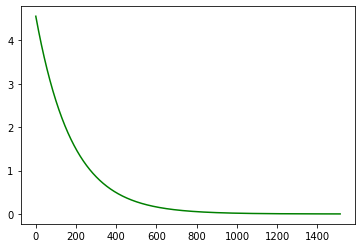

x value [[9.71264239]
 [7.09965038]]
Gradient [[0.80251789]
 [2.41370637]]
Iterations: 1532
Time taken: 4.676575183868408


In [37]:
current = time.time()
X =[]
lam = random.random()
print('lambda initial: ',lam)
theta = 100000
print('theta intial:', theta)
x = xVec
print('x intial:', x)
x1 = GD(x,lam,f_grad)
print('x1 intial:', x1)
gr2 = []
count =1
while np.linalg.norm(f_grad(x1)) > 1e-3:
    lam_prev = lam
    min1 = np.sqrt(1 + theta)*lam
    min2 = (np.linalg.norm(x1 - x))/(2*np.linalg.norm(f_grad(x1) - f_grad(x)))
    print('min1:', min1)
    print('min2:', min2)
    lam = np.min([min1, min2])
    print('lambda: ',lam)
    temp = x1
    x1 = GD(x, lam, f_grad)
    print('x1:', x1)
    x = temp
    print('x:', x)
    theta = (lam/lam_prev)
    print('theta:', theta)
    count += 1
    grad = np.linalg.norm(f_grad(x1))
    print('Gradient Norm:', grad)
    gr2.append(grad)
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.show()
print('x value', x)
print('Gradient', f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)